In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_data = torchvision.datasets.FashionMNIST(root="/content", train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_data = torchvision.datasets.FashionMNIST(root="/content", train=False, transform=torchvision.transforms.ToTensor(), download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [9]:
print(train_data)
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /content
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /content
    Split: Test
    StandardTransform
Transform: ToTensor()


In [12]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=True, num_workers=2)

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [13]:
class FashionClassifier(nn.Module):
    def __init__(self):
        super(FashionClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(5*5*64, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)
        self.outputs = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = x.view(-1, 5*5*64)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.outputs(x)
        return x
model = FashionClassifier()
model.to(device)
print(model)

FashionClassifier(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
  (outputs): Softmax(dim=1)
)


In [63]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 100
epoch_number = 0

for epoch in range(epochs):
    print('EPOCH {}:'.format(epoch_number + 1))
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            last_loss = running_loss / 100
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.0
        
    running_vloss = 0.0
    for i, vdata in enumerate(test_loader):
        vinputs, vlabels = vdata
        vinputs, vlabels = vinputs.to(device), vlabels.to(device)
        voutputs = model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(loss, avg_vloss))
    epoch_number += 1
print("done")

EPOCH 1:
  batch 100 loss: 1.7860744178295136
  batch 200 loss: 1.6974279761314393
  batch 300 loss: 1.6903932535648345
  batch 400 loss: 1.669086322784424
  batch 500 loss: 1.661066164970398
  batch 600 loss: 1.646254757642746
LOSS train 1.6610467433929443 valid 1.6504714488983154
EPOCH 2:
  batch 100 loss: 1.6419450676441192
  batch 200 loss: 1.6358818924427032
  batch 300 loss: 1.6334384346008302
  batch 400 loss: 1.6313908624649047
  batch 500 loss: 1.6236938214302064
  batch 600 loss: 1.6262111175060272
LOSS train 1.6261329650878906 valid 1.6326704025268555
EPOCH 3:
  batch 100 loss: 1.618163696527481
  batch 200 loss: 1.6122889089584351
  batch 300 loss: 1.6104009664058685
  batch 400 loss: 1.6029999542236328
  batch 500 loss: 1.6096508765220643
  batch 600 loss: 1.6036644577980042
LOSS train 1.59820556640625 valid 1.621383786201477
EPOCH 4:
  batch 100 loss: 1.5987495923042296
  batch 200 loss: 1.5932887673377991
  batch 300 loss: 1.607062224149704
  batch 400 loss: 1.6039650988

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7faaa4307320>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7faaa4307320>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1481, in __del__
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1481, in __del__
    self._shutdown_workers()
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1464, in _shutdown_workers
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1464, in _shutdown_workers
    if w.is_alive():
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
  File "/usr/lib/pytho

  batch 100 loss: 1.5726486682891845
  batch 200 loss: 1.5694813442230224
  batch 300 loss: 1.57037846326828
  batch 400 loss: 1.571930592060089
  batch 500 loss: 1.5730807447433472
  batch 600 loss: 1.5747925424575806
LOSS train 1.5507012605667114 valid 1.5789536237716675
EPOCH 11:
  batch 100 loss: 1.5715675461292267
  batch 200 loss: 1.5702116060256959
  batch 300 loss: 1.5714194416999816
  batch 400 loss: 1.5727205741405488
  batch 500 loss: 1.571657885313034
  batch 600 loss: 1.5760202646255492
LOSS train 1.574082612991333 valid 1.5851850509643555
EPOCH 12:
  batch 100 loss: 1.5685166585445405
  batch 200 loss: 1.5717189121246338
  batch 300 loss: 1.5630365109443665
  batch 400 loss: 1.5668713104724885
  batch 500 loss: 1.571319854259491
  batch 600 loss: 1.5701756858825684
LOSS train 1.5598281621932983 valid 1.5799784660339355
EPOCH 13:
  batch 100 loss: 1.5616187143325806
  batch 200 loss: 1.5667388606071473
  batch 300 loss: 1.563013710975647
  batch 400 loss: 1.568296576738357

In [64]:
test_iter = iter(test_loader)
data, labels = test_iter.next()

In [65]:
print(data[0])
print(labels[0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0039, 0.0980, 0.4118, 0.8235, 0.7569, 0.7765, 0.8471, 0.8706,
          0.7255, 0.1725, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.2235, 0.6118,
          0.6235, 0.9765, 0.5490, 0.5020, 0.6431, 0.8510, 0.8314, 0.5137,
          0.4078, 0.5451, 0.4000, 0.3294, 0.4078, 0.1647, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5373, 0.5216, 0.6275,
          0.5765, 0.4353, 0.4706, 0.4706, 0.3961, 0.3412, 0.3137, 0.3882,
          0.4078, 0.3843, 0.4314, 0.5216, 0.4000, 0.4745, 0.2941, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.4784, 0.6941, 0.5490, 0.5922,
          0.5569, 0.4549, 0.4745, 0.4667, 0.4314, 0.4118, 0.4196, 0.3804,
          0.3961, 0.3804, 0.3529, 0.5137, 0.3725, 0.5059,

Pullover


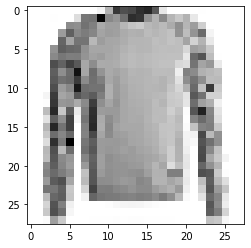

In [66]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img * 255    # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
class_labels = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
img_grid = torchvision.utils.make_grid(data[0])
matplotlib_imshow(img_grid, one_channel=True)
print(class_labels[labels[0]])

In [67]:
pred = model(data[0].to(device))
label = torch.argmax(pred)
print(class_labels[label])

Pullover


In [68]:
pred = model(data[5].to(device))
label = torch.argmax(pred)
print(class_labels[label])

Pullover


In [69]:
for i in range(6):
    pred = model(data[i].to(device))
    label = torch.argmax(pred)
    print(f"pred:{class_labels[label]}")
    print(f"true:{class_labels[labels[i]]}")
    print("====")

pred:Pullover
true:Pullover
====
pred:Pullover
true:Pullover
====
pred:Pullover
true:Pullover
====
pred:Bag
true:Bag
====
pred:Sandal
true:Sandal
====
pred:Pullover
true:Pullover
====
